In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('restaurant.csv')



#convert 

# features = list(data)
# colnames = np.transpose(features)


# Data Cleansing


In [17]:
#drop those irrelevant columns
new_data = data.drop(['_id', 'address', 'label', 'phone', 'restauranLink'], axis = 1)

#Move the name to first column as label
restaurant_name = new_data['restaurantName']
new_data.drop(labels=['restaurantName'], axis=1,inplace = True)
new_data.insert(0, 'restaurantName', restaurant_name)

#convert ranking to numbers
new_data['ranking'] = new_data['ranking'].str.split(' ', n=1, expand=True)[0].str.replace('#', '').str.replace(',' ,'')

new_data = new_data.join(new_data['cuisine'].str.replace(' ', '').str.get_dummies(sep=','))
new_data = new_data.join(new_data['openMeal'].str.replace(' ', '').str.get_dummies(sep=','))
new_data = new_data.join(new_data['region'].str.replace(' ', '').str.get_dummies(sep=',').add_prefix('region_'))

#drop text based data as it has been converted to numeric representation
new_data.drop(labels=['restaurantName', 'cuisine', 'openMeal', 'region'], axis=1,inplace = True)

#conver the $ to numeric value
def convert(col):
    col = str(col)
    if col == '$$$$':
        return  4
    elif col == '$$ - $$$':
        return 2.5
    elif col == '$$$':
        return 3
    elif col == '$$':
        return 2
    elif col == '$':
        return 1
    else:
        return 2.5

new_data['ratingAndPopularity'] = new_data['ratingAndPopularity'].apply(convert)


#Drop these columns:
# numbeOfReviews,numberAverage,numberExcellent,numberPoor,numberTerrible,numberVeryGood
#This is due to there are percentage based data representation:
# ratingAverage,ratingExcellent,ratingPoor,ratingTerrible,ratingVeryGood which is more meaningful than counts,
#As a new restaurant definitely has less number of counts than existing, but it could be a good restaurant
new_data.drop(labels=['numbeOfReviews', 'numberAverage', 'numberExcellent', 'numberPoor', 'numberTerrible', 'numberVeryGood'], axis=1,inplace = True)

#convert percentage string to float
new_data['ratingAverage'] = new_data['ratingAverage'].str.rstrip('%').astype('float') / 100.0
new_data['ratingExcellent'] = new_data['ratingExcellent'].str.rstrip('%').astype('float') / 100.0
new_data['ratingPoor'] = new_data['ratingPoor'].str.rstrip('%').astype('float') / 100.0
new_data['ratingTerrible'] = new_data['ratingTerrible'].str.rstrip('%').astype('float') / 100.0
new_data['ratingVeryGood'] = new_data['ratingVeryGood'].str.rstrip('%').astype('float') / 100.0

print(new_data.head())




   Atmosphere  Food  Service  Value ranking  ratingAndPopularity  \
0         4.5   4.5      4.5    4.0      31                  2.5   
1         4.5   4.5      4.5    4.0      32                  4.0   
2         4.0   4.5      4.0    4.5      33                  2.5   
3         4.5   4.5      4.5    4.0      34                  2.5   
4         NaN   4.0      4.5    4.5      35                  2.5   

   ratingAverage  ratingExcellent  ratingPoor  ratingTerrible  ...  \
0           0.06             0.58        0.02            0.01  ...   
1           0.09             0.57        0.02            0.01  ...   
2           0.08             0.57        0.02            0.01  ...   
3           0.07             0.55        0.03            0.02  ...   
4           0.03             0.87        0.00            0.00  ...   

   region_Sushi  region_Swedish  region_Swiss  region_Taiwanese  region_Thai  \
0             0               0             0                 0            0   
1         

# Deal with Missing Data 


In [31]:
null_columns=new_data.columns[new_data.isnull().any()]
print(new_data[null_columns].isnull().sum())

# 
from sklearn.preprocessing import Imputer
values = new_data.values
#Use median instead of mean, mean may not represent most of the data.
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
new_value = imputer.fit_transform(values)

new_data = pd.DataFrame(new_value)

#after adding missing value
print('After adding missing value')
null_columns=new_data.columns[new_data.isnull().any()]
print(new_data[null_columns].isnull().sum())
# 
# 
# 
# null_columns=new_data.columns[new_data.isnull().any()]
# print(new_data[null_columns].isnull().sum())


Atmosphere         144
totalPageNumber     12
dtype: int64
after adding missing value
Series([], dtype: float64)


c:\users\guofe\virtualenv\psupr\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Standardize


In [35]:
# (5) STANDARDIZE data; mean=0;sd=1
data_std = StandardScaler().fit_transform(new_data)

print(pd.DataFrame(data_std).head())


        0         1         2         3         4         5         6    \
0  1.313281  0.987414  1.217310  0.401787 -1.717811 -0.049781 -1.096632   
1  1.313281  0.987414  1.217310  0.401787 -1.715032  1.991225 -0.628062   
2  0.146159  0.987414 -0.041976  1.685417 -1.712254 -0.049781 -0.784252   
3  1.313281  0.987414  1.217310  0.401787 -1.709476 -0.049781 -0.940442   
4  0.000000 -0.530735  1.217310  1.685417 -1.706697 -0.049781 -1.565203   

        7         8         9    ...       148       149       150       151  \
0  1.087384 -0.518800 -0.585074  ... -0.224464 -0.040357 -0.040357 -0.075655   
1  1.022163 -0.518800 -0.585074  ... -0.224464 -0.040357 -0.040357 -0.075655   
2  1.022163 -0.518800 -0.585074  ... -0.224464 -0.040357 -0.040357 -0.075655   
3  0.891721 -0.166829 -0.137258  ... -0.224464 -0.040357 -0.040357 -0.075655   
4  2.978785 -1.222742 -1.032891  ... -0.224464 -0.040357 -0.040357 -0.075655   

        152       153       154       155       156       157  
0 -0

# Run PCA


In [ ]:
# (6) Apply PCA. Get Eigenvctors, Eigenvalues
# Loadings = Correlation coefficient betwn PC & feature 
features = list(new_data)
colnames = np.transpose(features)

n_components = len(features)
pca = PCA(n_components).fit(data_std)

# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))
    
# Get Eigenvectors & Eigenvalues
eigvec = pca.components_.transpose()
eigval = pca.explained_variance_

# Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
print('Loading Matrix:'); loadings= np.sqrt(eigval)*eigvec
print(pd.DataFrame(loadings,columns=PCs,index=colnames),'\n')

# (7) Print out Eigenvectors
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigvec,columns=PCs,index=colnames),'\n')

var_expln= pca.explained_variance_ratio_ * 100
eigval = -np.sort(-eigval) #descending
npc = 6 # display-1
print("Eigenvalues   :",eigval[0:npc])
print("%Explained_Var:",var_expln[0:npc])
print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
print('\n')


# Plot


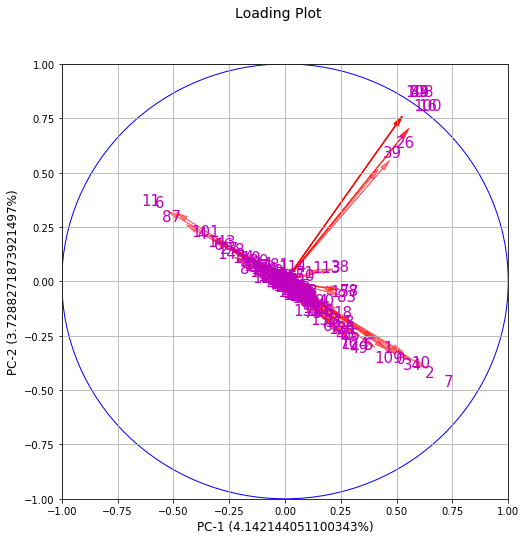

In [33]:
# (8) Loadings Plot
coeff = loadings[:,0:2]
fig = plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
fig.suptitle('Loading Plot',fontsize=14)
plt.xlabel('PC-1 ('+str(var_expln[0])+'%)',fontsize=12)
plt.ylabel('PC-2 ('+str(var_expln[1])+'%)',fontsize=12)

for i in range(len(coeff[:,0])):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05,length_includes_head=True)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,features[i],fontsize=15,
             color='m',ha='center',va='center')

circle = plt.Circle((0, 0), 0.9999999,  color='b', fill=False)
ax = fig.gca(); ax.add_artist(circle)
plt.grid(); plt.show()